Testing Score: 0.8978345590825202
MSE: 1989030055.8791063
MAE: 15991.888077974203
RMSE: 44598.54320355214


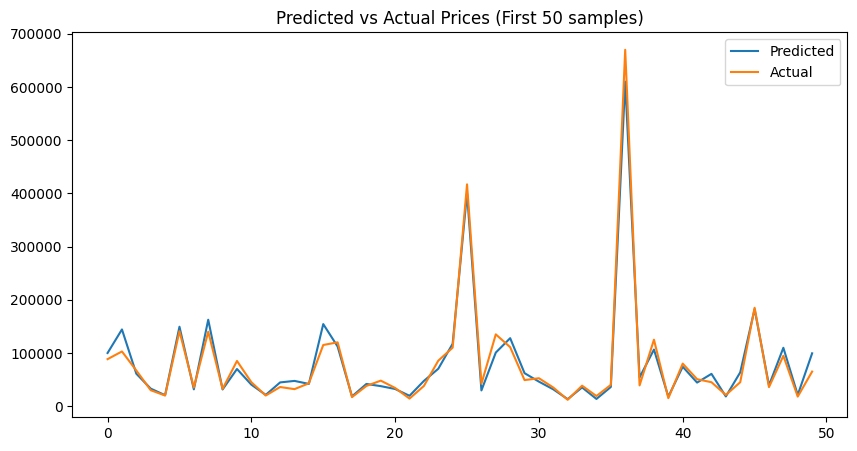

R² Score (Accuracy for Regression): 0.8978345590825202


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math
import joblib as jb

# Load and clean data
df = pd.read_csv('Used_Bikes.csv')
df.drop_duplicates(inplace=True)
df.drop(['bike_name', 'city'], axis=1, inplace=True)

# Encode owner column
owner_map = {
    'First Owner': 1,
    'Second Owner': 2,
    'Third Owner': 3,
    'Fourth Owner Or More': 4
}
df['owner'] = df['owner'].map(owner_map)

# Label encode brand
encoder = LabelEncoder()
df['brand'] = encoder.fit_transform(df['brand'])

# Features and target
x = df.drop('price', axis=1)
y = df[['price']]

# Train-test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Model training
model = GradientBoostingRegressor()
model.fit(x_train, y_train.values.ravel())

# Prediction
pred = model.predict(x_test)

# Evaluation
print("Testing Score:", model.score(x_test, y_test))
print("MSE:", mean_squared_error(y_test, pred))
print("MAE:", mean_absolute_error(y_test, pred))
print("RMSE:", math.sqrt(mean_squared_error(y_test, pred)))

# Save model
jb.dump(model, 'bike_price_predictor.pkl')

# Optional: Visualizing Predictions
plt.figure(figsize=(10,5))
plt.plot(pred[:50], label='Predicted')
plt.plot(y_test.values[:50], label='Actual')
plt.legend()
plt.title('Predicted vs Actual Prices (First 50 samples)')
plt.show()

# R² Score
from sklearn.metrics import r2_score
r2 = r2_score(y_test, pred)
print("R² Score (Accuracy for Regression):", r2)
